# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/py

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train,False)
x_test = preproc_x(x_test,False)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

def build_ml():
    """
    Build your own model
    """
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(rate=0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))
    
    return model


In [14]:
## 超參數設定
"""
Set your required experiment parameters
"""
from keras.optimizers import SGD,RMSprop,Adagrad,Adam

LEARNING_RATE=[1e-2,1e-3,1e-4]
OPTIMIZER=[SGD,RMSprop,Adagrad,Adam]
BATCH_SIZE=64
EPOCHS=30

In [22]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr_al in OPTIMIZER:
    for lr in LEARNING_RATE:
        print('opt=%s' % str(lr_al))
        print('lr=%s' % str(lr))
        keras.backend.clear_session()
        opt=lr_al(lr=lr)
        model=build_ml()
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(x_train,y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,validation_data=(x_test,y_test),
                  shuffle=True)
        
        exp_name='exp_opt_%s_lr_%s' % (str(lr_al),str(lr))
        
        results[exp_name]=model.history.history

opt=<class 'keras.optimizers.SGD'>
lr=0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 86s 2ms/step - loss: 1.9630 - acc: 0.2988 - val_loss: 1.8223 - val_acc: 0.3795
Epoch 2/30
50000/50000 [==============================] - 85s 2ms/step - loss: 1.7224 - acc: 0.3953 - val_loss: 1.6419 - val_acc: 0.4308
Epoch 3/30
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5687 - acc: 0.4452 - val_loss: 1.5190 - val_acc: 0.4851
Epoch 4/30
50000/50000 [==============================] - 85s 2ms/step - loss: 1.4577 - acc: 0.4817 - val_loss: 1.4040 - val_acc: 0.5170
Epoch 5/30
50000/50000 [==============================] - 85s 2ms/step - loss: 1.3816 - acc: 0.5093 - val_loss: 1.3394 - val_acc: 0.5417
Epoch 6/30
50000/50000 [==============================] - 85s 2ms/step - loss: 1.3310 - acc: 0.5285 - val_loss: 1.2950 - val_acc: 0.5557
Epoch 7/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.2868

50000/50000 [==============================] - 83s 2ms/step - loss: 1.5025 - acc: 0.4695 - val_loss: 1.4848 - val_acc: 0.4935
Epoch 30/30
50000/50000 [==============================] - 83s 2ms/step - loss: 1.4928 - acc: 0.4720 - val_loss: 1.4768 - val_acc: 0.4951
opt=<class 'keras.optimizers.SGD'>
lr=0.0001
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 83s 2ms/step - loss: 2.3230 - acc: 0.1014 - val_loss: 2.2955 - val_acc: 0.1305
Epoch 2/30
50000/50000 [==============================] - 83s 2ms/step - loss: 2.3030 - acc: 0.1151 - val_loss: 2.2845 - val_acc: 0.1317
Epoch 3/30
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2891 - acc: 0.1270 - val_loss: 2.2748 - val_acc: 0.1382
Epoch 4/30
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2782 - acc: 0.1383 - val_loss: 2.2657 - val_acc: 0.1586
Epoch 5/30
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2678 - acc: 

50000/50000 [==============================] - 99s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/30
50000/50000 [==============================] - 100s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/30
50000/50000 [==============================] - 100s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/30
50000/50000 [==============================] - 100s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/30
50000/50000 [==============================] - 100s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
opt=<class 'keras.optimizers.RMSprop'>
lr=0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 103s 2ms/step - loss: 1.5405 - acc: 0.4678 - val_loss: 1.5710 - val_acc: 0.4522
Epoch 2/30
50000/50000 [==============================] - 111s 2ms/step 

50000/50000 [==============================] - 101s 2ms/step - loss: 0.6394 - acc: 0.7826 - val_loss: 0.9179 - val_acc: 0.6825
Epoch 24/30
50000/50000 [==============================] - 106s 2ms/step - loss: 0.6209 - acc: 0.7884 - val_loss: 0.9218 - val_acc: 0.6811
Epoch 25/30
50000/50000 [==============================] - 101s 2ms/step - loss: 0.5989 - acc: 0.7963 - val_loss: 0.9032 - val_acc: 0.6883
Epoch 26/30
50000/50000 [==============================] - 101s 2ms/step - loss: 0.5824 - acc: 0.8018 - val_loss: 0.9245 - val_acc: 0.6819
Epoch 27/30
50000/50000 [==============================] - 101s 2ms/step - loss: 0.5624 - acc: 0.8096 - val_loss: 0.8959 - val_acc: 0.6895
Epoch 28/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.5414 - acc: 0.8167 - val_loss: 0.9144 - val_acc: 0.6851
Epoch 29/30
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5244 - acc: 0.8233 - val_loss: 0.9057 - val_acc: 0.6883
Epoch 30/30
50000/50000 [==============

50000/50000 [==============================] - 95s 2ms/step - loss: 1.1869 - acc: 0.5907 - val_loss: 1.2361 - val_acc: 0.5829
Epoch 22/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1792 - acc: 0.5920 - val_loss: 1.2322 - val_acc: 0.5843
Epoch 23/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1728 - acc: 0.5944 - val_loss: 1.2234 - val_acc: 0.5904
Epoch 24/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1671 - acc: 0.5969 - val_loss: 1.2172 - val_acc: 0.5910
Epoch 25/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1613 - acc: 0.5973 - val_loss: 1.2125 - val_acc: 0.5962
Epoch 26/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1563 - acc: 0.6008 - val_loss: 1.2048 - val_acc: 0.5973
Epoch 27/30
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1489 - acc: 0.6034 - val_loss: 1.2034 - val_acc: 0.5938
Epoch 28/30
50000/50000 [=====================

50000/50000 [==============================] - 114s 2ms/step - loss: 1.6989 - acc: 0.4045 - val_loss: 1.7546 - val_acc: 0.3723
Epoch 20/30
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6965 - acc: 0.4032 - val_loss: 1.7456 - val_acc: 0.3792
Epoch 21/30
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6987 - acc: 0.4024 - val_loss: 1.7192 - val_acc: 0.3854
Epoch 22/30
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6778 - acc: 0.4104 - val_loss: 1.7758 - val_acc: 0.3566
Epoch 23/30
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6942 - acc: 0.4006 - val_loss: 1.7315 - val_acc: 0.3794
Epoch 24/30
50000/50000 [==============================] - 115s 2ms/step - loss: 1.6832 - acc: 0.4073 - val_loss: 1.7455 - val_acc: 0.3810
Epoch 25/30
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6845 - acc: 0.4059 - val_loss: 1.8060 - val_acc: 0.3432
Epoch 26/30
50000/50000 [==============

Epoch 17/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.7043 - acc: 0.7585 - val_loss: 0.9179 - val_acc: 0.6849
Epoch 18/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.6741 - acc: 0.7695 - val_loss: 0.9081 - val_acc: 0.6875
Epoch 19/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.6502 - acc: 0.7780 - val_loss: 0.9124 - val_acc: 0.6832
Epoch 20/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.6231 - acc: 0.7899 - val_loss: 0.8887 - val_acc: 0.6950
Epoch 21/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.6006 - acc: 0.7953 - val_loss: 0.8859 - val_acc: 0.6928
Epoch 22/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.5714 - acc: 0.8072 - val_loss: 0.8802 - val_acc: 0.6954
Epoch 23/30
50000/50000 [==============================] - 117s 2ms/step - loss: 0.5527 - acc: 0.8145 - val_loss: 0.9045 - val_acc: 0.6876
Epoch 24/30
50000/50000 [==

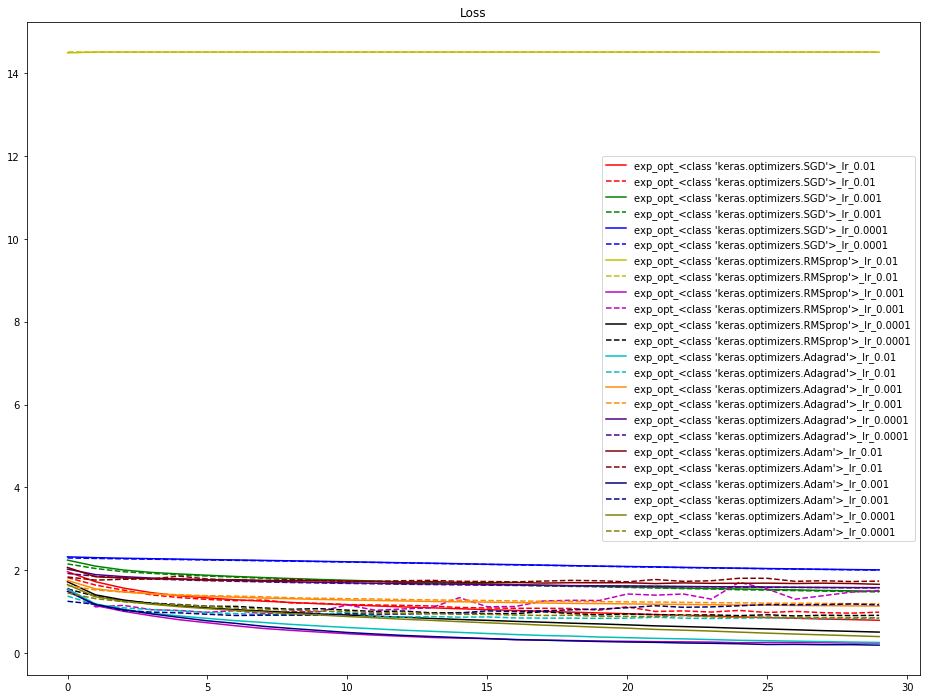

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange", "indigo", "maroon", "navy", "olive"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()


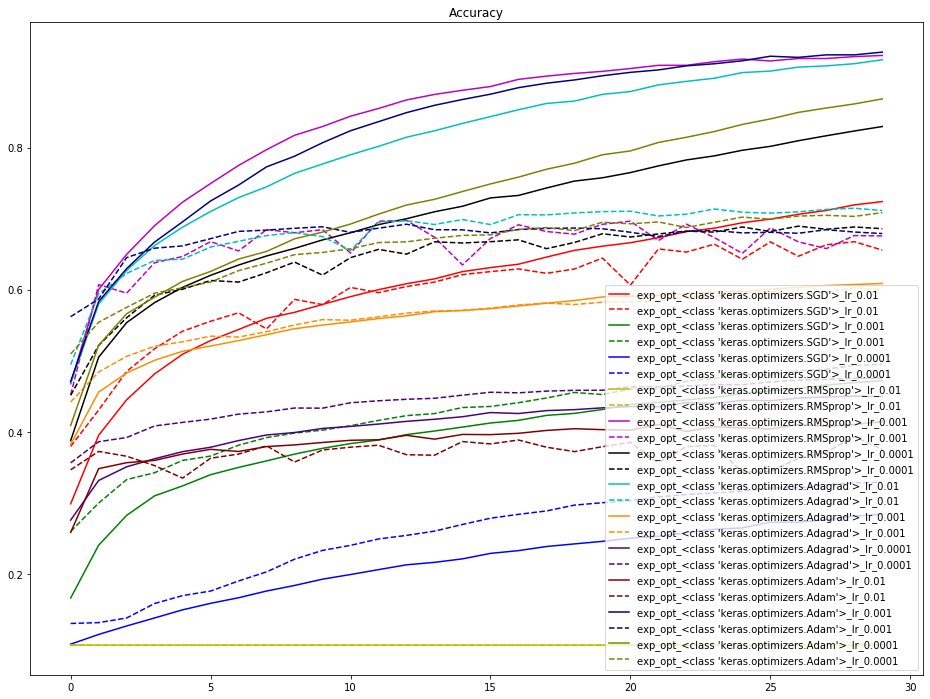

In [41]:
plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['acc'])),results[con]['acc'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_acc'])),results[con]['val_acc'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()